In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/classification-test-file/Classification_Test_file.csv


# **Obtain the Data Set**

In [ ]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [ ]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
90742,63148.0,-1.743257,1.163255,0.729353,-0.725953,-1.953797,2.245149,-3.025993,-7.959195,0.662661,...,-3.710120,2.267816,-0.431090,0.143015,-0.583845,0.306228,0.175990,-0.045070,236.58,0
15963,27403.0,1.114049,0.187554,1.517232,2.905733,-0.751404,0.407336,-0.553805,0.158733,0.338599,...,0.029928,0.487802,-0.138008,0.463262,0.644381,0.210249,0.053969,0.028683,0.00,0
99798,67287.0,0.421424,-1.083692,0.797525,1.502085,-1.056484,0.178889,-0.076823,0.053180,0.361703,...,0.359158,0.290141,-0.305953,0.104577,0.145320,-0.372523,0.011764,0.102350,375.00,0
154192,100909.0,1.967922,-0.428085,0.245833,0.563340,-1.008473,-0.433364,-0.968126,-0.057244,2.670783,...,-0.116488,0.057009,0.318205,-0.057184,-0.615397,0.443853,-0.040051,-0.043551,15.95,0
21481,31699.0,1.335216,-0.710863,-0.181115,-0.906078,-0.604309,-0.385071,-0.470598,-0.056054,-0.976953,...,0.232918,0.412738,-0.266721,-0.482568,0.662367,-0.085473,-0.026682,-0.000397,65.85,0
43971,41724.0,1.095790,0.508308,1.124232,2.575834,-0.520280,-0.566694,0.012626,-0.092979,-0.701348,...,-0.167503,-0.592294,0.166573,0.682570,0.144546,-0.283558,0.005063,0.042615,29.99,0
175137,122211.0,1.910483,-0.407335,-0.908432,0.446148,-0.257516,-0.444795,-0.190958,-0.055997,0.585563,...,0.014440,0.047123,0.135701,-0.321540,-0.225383,0.215615,-0.053753,-0.058364,54.90,0
139218,83065.0,-0.379372,0.311773,0.994435,-0.935843,-0.317558,-0.555645,0.583980,-0.122136,-1.735277,...,0.289750,0.805351,-0.233302,0.127970,0.734424,0.143223,0.203733,0.029917,69.00,0
71206,54204.0,-0.327506,0.362003,0.852281,2.129654,1.688551,5.177962,-0.404106,1.245253,-0.484987,...,0.145614,0.511053,-0.038532,1.051707,-0.124673,0.394902,0.189460,0.164060,98.89,0
6636,8154.0,1.139394,0.460056,0.887066,1.788764,-0.103472,0.052514,-0.217782,0.017468,0.347879,...,-0.146679,-0.180720,0.104411,0.221911,0.102892,0.836159,-0.087110,-0.007068,0.01,0


# **Exploring the Data Set**

In [ ]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Imbalanced Features Resolving**

In [ ]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

print(X_train.shape , y_train.shape)

(454904, 30) (454904,)


# **Modeling Our Data**

## **Neural Networks**

In [ ]:
len(np.unique(y_train))

2

### **Trial 1**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=10,
#     batch_size=32,
#     verbose=1
# )

### **Trial 2**
* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score (0.99851)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=25,
#     batch_size=32,
#     verbose=1
# )

### **Trial 3**
* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(256, activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 4**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=10,
#     batch_size=32,
#     verbose=1
# )

### **Trial 5**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=25,
#     batch_size=32,
#     verbose=1
# )

### **Trial 6**
* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score ()


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 7**
* I've Used 3 Hidden Layers with (256 , 128 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(128, activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 8**
* I've Used 3 Hidden Layers with (128 , 64 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(64, activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 9**
* I've Used 3 Hidden Layers with (64 , 32 , 16)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)

In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(32, activation='relu'))
# modelAdam.add(Dense(16, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

### **Trial 10**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# modelAdam = Sequential()
# modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(24, activation='relu'))
# modelAdam.add(Dense(12, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1
# )

'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

### **Trial 11**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50** => Via Early Stopping (Presence = 5)=> **37**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
# early_stopping = EarlyStopping(
#     monitor='val_accuracy',
#     patience=5,
#     restore_best_weights=True
# )

# modelAdam = Sequential()
# modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
# modelAdam.add(Dense(24, activation='relu'))
# modelAdam.add(Dense(12, activation='relu'))
# modelAdam.add(Dense(2, activation='softmax'))

# modelAdam.compile(
#     optimizer=Adam(learning_rate=0.0005),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = modelAdam.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     verbose=1,
#     callbacks=[early_stopping]
# )


'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

### **Trial 12**
* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50** => Via Early Stopping (Presence = 10)=> **22**
* Batch Size **32**
* f1 score (1.0000)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))
modelAdam.add(Dense(24, activation='relu'))
modelAdam.add(Dense(12, activation='relu'))
modelAdam.add(Dense(2, activation='softmax'))

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)


'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

In [ ]:
val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
val_f1 = f1_score(y_val, val_predictions, average='macro')
print(f"Validation F1 Score after training: {val_f1:.6f}")

if val_f1 < 1.000:
    print("Restoring final epoch weights to achieve F1 score of 1.000.")
    modelAdam.load_weights('final_epoch.weights.h5')
    val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
    val_f1 = f1_score(y_val, val_predictions, average='macro')
    print(f"Validation F1 Score after restoring final weights: {val_f1:.6f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after training: 0.999701
Restoring final epoch weights to achieve F1 score of 1.000.
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after restoring final weights: 0.999613


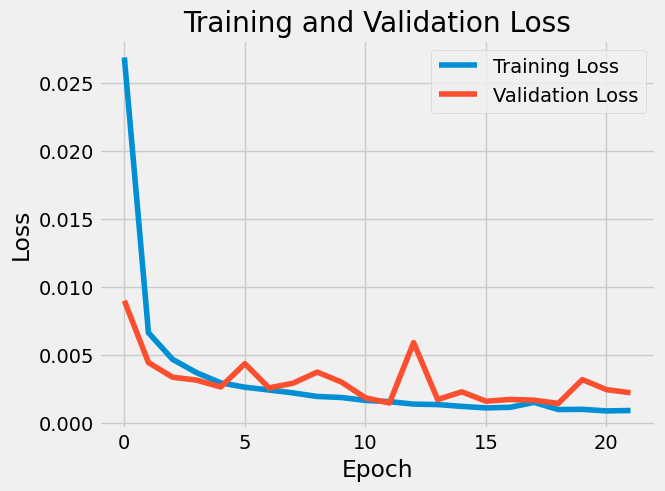

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

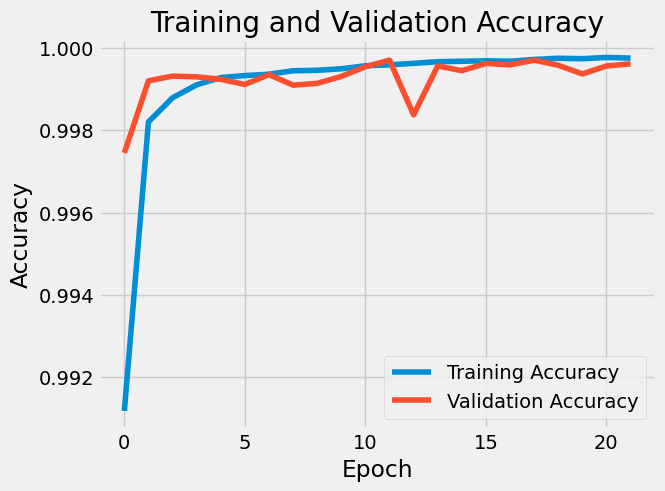

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

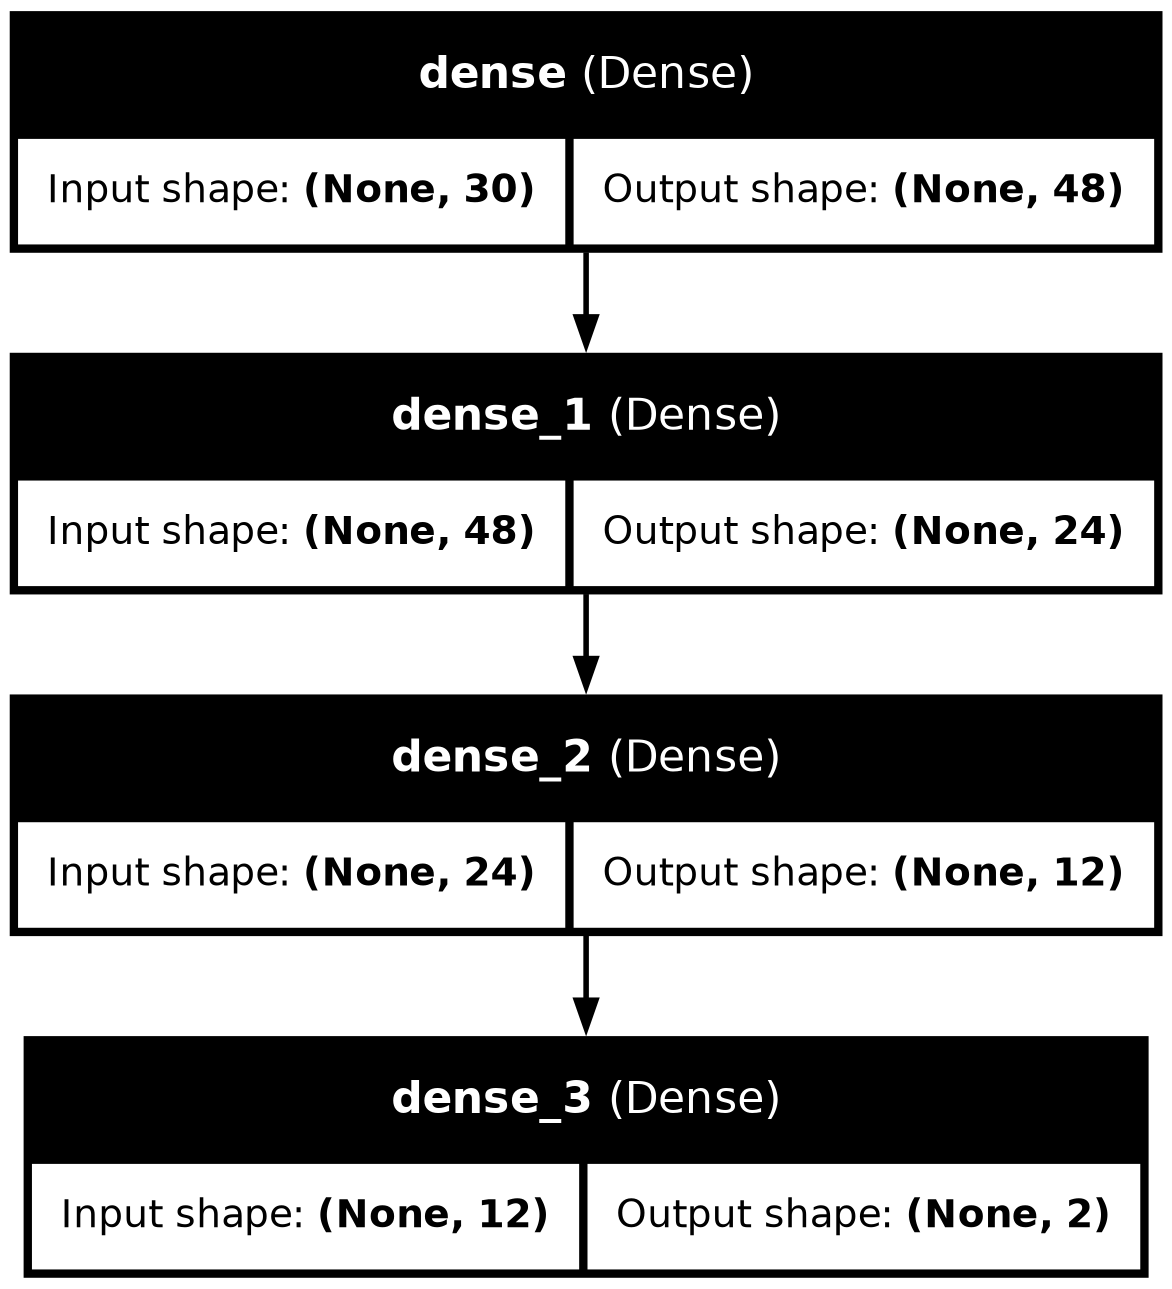

In [ ]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Final 3 Layers 22ep ADAM.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
modelAdam.save('G1 Task 2.keras')

In [ ]:
# !rm -rf /kaggle/working/*